In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.crawler_utils import *
import tqdm.notebook as tq

In [2]:
import matplotlib

In [64]:
import os 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 5
})

In [3]:
df = pd.DataFrame()
for team in tq.tqdm(premier_abbr):
    dt = pd.read_csv(f'../data/comments/gameday/Sentiment/{team}_gameday_comments_sentiment.csv')
    df = pd.concat([df,dt])

In [6]:
df.shape

(3192471, 10)

In [4]:
df_0 = df.loc[df.sentiment_score!=0]

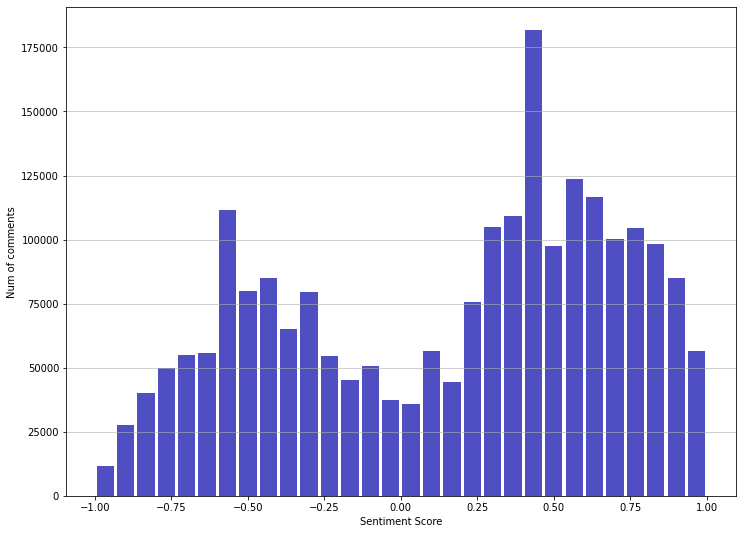

In [5]:
plt.figure(figsize = (12,9))
n, bins, patches = plt.hist(x=df_0['sentiment_score'], bins=30, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Num of comments')
plt.xlabel('Sentiment Score')
plt.show()

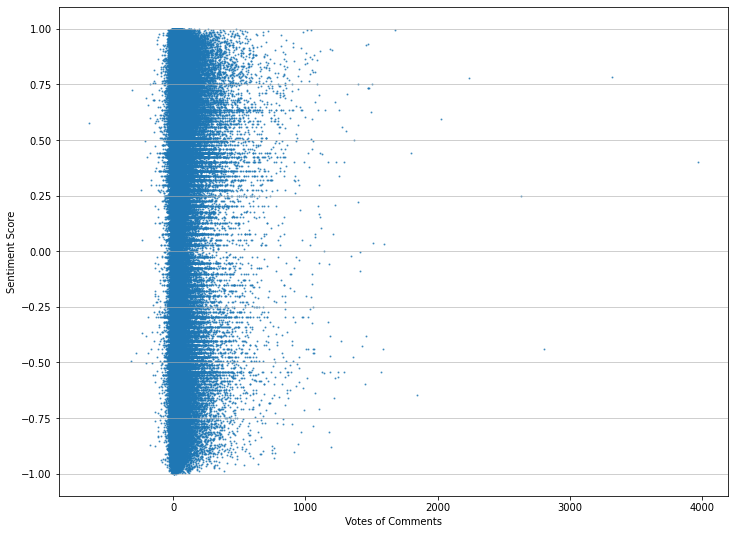

In [14]:
plt.figure(figsize = (12,9))
plt.scatter(df_0['ups'],df_0['sentiment_score'],s=1,alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Sentiment Score')
plt.xlabel('Votes of Comments')
plt.show()

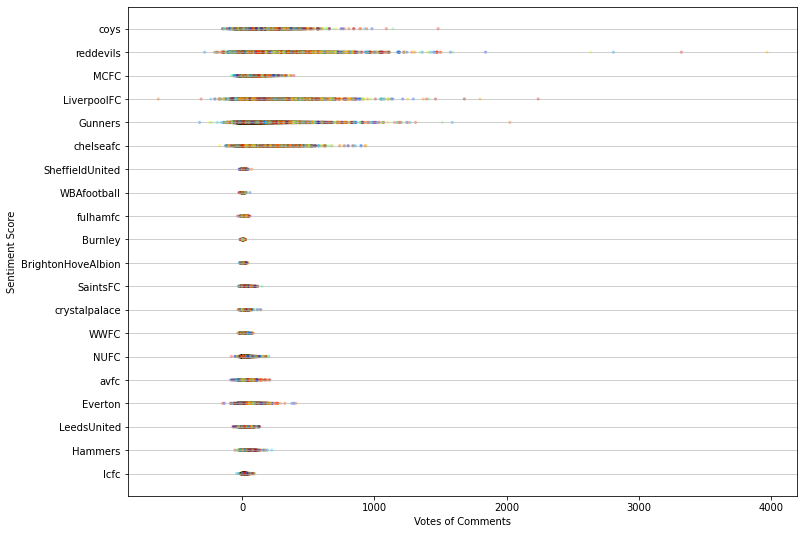

In [12]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(6.4, 4.2)
ax.scatter(df_0['ups'],df_0['sentiment_score'],s=1,alpha=0.3)
ax.grid(axis='y', alpha=0.75)
ax.set_ylabel('Sentiment Score')
ax.set_xlabel('Votes of Comments')
plt.show()
#plt.savefig('../../Final Report/Assets/Votes_Sentiment.pgf', bbox_inches='tight')

In [19]:
df.loc[df.sentiment_score<-0.75].shape[0]/df.shape[0]

0.036525312211136765

In [17]:
dis = pd.DataFrame(index=['-1.0~-0.75','-0,75~-0.50','-0.50~-0.25','-0,25~0.00','0.00~0.25','0.25~0.50','0.50~0.75','0.75~1.0'])
div = pd.DataFrame(index=['-1.0~-0.75','-0,75~-0.50','-0.50~-0.25','-0,25~0.00','0.00~0.25','0.25~0.50','0.50~0.75','0.75~1.0'])

In [20]:
df = pd.DataFrame()
for team in tq.tqdm(premier_abbr):
    dt = pd.read_csv(f'../data/comments/gameday/Sentiment/{team}_gameday_comments_sentiment.csv')
    dt = dt.loc[dt.sentiment_score!=0]
    size = dt.shape[0]
    prop = []
    prop.append(dt.loc[dt.sentiment_score<-0.75].shape[0]/size)
    prop.append(dt.loc[(dt.sentiment_score>=-0.75)&(dt.sentiment_score<-0.5)].shape[0]/size)
    prop.append(dt.loc[(dt.sentiment_score>=-0.50)&(dt.sentiment_score<-0.25)].shape[0]/size)
    prop.append(dt.loc[(dt.sentiment_score>=-0.25)&(dt.sentiment_score<0)].shape[0]/size)
    prop.append(dt.loc[(dt.sentiment_score>=0.00)&(dt.sentiment_score<0.25)].shape[0]/size)
    prop.append(dt.loc[(dt.sentiment_score>0.25)&(dt.sentiment_score<=0.50)].shape[0]/size)
    prop.append(dt.loc[(dt.sentiment_score>0.50)&(dt.sentiment_score<=0.75)].shape[0]/size)
    prop.append(dt.loc[dt.sentiment_score>0.75].shape[0]/size)
    
    vo = []
    vo.append(dt.loc[dt.sentiment_score<-0.75]['ups'].mean())
    vo.append(dt.loc[(dt.sentiment_score>=-0.75)&(dt.sentiment_score<-0.5)]['ups'].mean())
    vo.append(dt.loc[(dt.sentiment_score>=-0.50)&(dt.sentiment_score<-0.25)]['ups'].mean())
    vo.append(dt.loc[(dt.sentiment_score>=-0.25)&(dt.sentiment_score<0)]['ups'].mean())
    vo.append(dt.loc[(dt.sentiment_score>=0.00)&(dt.sentiment_score<0.25)]['ups'].mean())
    vo.append(dt.loc[(dt.sentiment_score>0.25)&(dt.sentiment_score<=0.50)]['ups'].mean())
    vo.append(dt.loc[(dt.sentiment_score>0.50)&(dt.sentiment_score<=0.75)]['ups'].mean())
    vo.append(dt.loc[dt.sentiment_score>0.75]['ups'].mean())
    dis[team] = prop
    div[team] = vo
#     print("-1.0~-0,75:",dt.loc[dt.sentiment_score<-0.75].shape[0]/size,"  /  ",dt.loc[dt.sentiment_score<-0.75]['ups'].mean())
#     print("-0,75~-0.50:",dt.loc[(dt.sentiment_score>=-0.75)&(dt.sentiment_score<-0.5)].shape[0]/size,"  /  ",dt.loc[(dt.sentiment_score>=-0.75)&(dt.sentiment_score<-0.5)]['ups'].mean())
#     print("-0.50~-0.25:",dt.loc[(dt.sentiment_score>=-0.50)&(dt.sentiment_score<-0.25)].shape[0]/size,"  /  ",dt.loc[(dt.sentiment_score>=-0.50)&(dt.sentiment_score<-0.25)]['ups'].mean())
#     print("-0,25~0.00:",dt.loc[(dt.sentiment_score>=-0.25)&(dt.sentiment_score<0)].shape[0]/size,"  /  ",dt.loc[(dt.sentiment_score>=-0.25)&(dt.sentiment_score<0)]['ups'].mean())
#     print("0.00~0.25:",dt.loc[(dt.sentiment_score>=0.00)&(dt.sentiment_score<0.25)].shape[0]/size,"  /  ",dt.loc[(dt.sentiment_score>=0.00)&(dt.sentiment_score<0.25)]['ups'].mean())
#     print("0.25~0.50:",dt.loc[(dt.sentiment_score>0.25)&(dt.sentiment_score<=0.50)].shape[0]/size,"  /  ",dt.loc[(dt.sentiment_score>0.25)&(dt.sentiment_score<=0.50)]['ups'].mean())
#     print("0.50~0.75:",dt.loc[(dt.sentiment_score>0.50)&(dt.sentiment_score<=0.75)].shape[0]/size,"  /  ",dt.loc[(dt.sentiment_score>0.50)&(dt.sentiment_score<=0.75)]['ups'].mean())
#     print("0.75~1.0:",dt.loc[dt.sentiment_score>0.75].shape[0]/size,"  /  ",dt.loc[dt.sentiment_score>0.75]['ups'].mean())

    

In [21]:
dis

,LEI,WHU,LEE,EVE,AST,NEW,WOL,PAL,SOT,BHA,BUR,FUL,WBA,SHW,CHE,ARS,LIV,MNC,MNU,TOT
-1.0~-0.75,0.025197,0.041574,0.037822,0.041753,0.042179,0.055148,0.046612,0.045597,0.040279,0.052693,0.029586,0.037946,0.054855,0.041099,0.046357,0.055610,0.055922,0.042870,0.054628,0.053624
"-0,75~-0.50",0.100331,0.120094,0.095963,0.124634,0.102902,0.131772,0.104268,0.092496,0.105317,0.101903,0.068047,0.090526,0.109709,0.137040,0.114035,0.117961,0.126700,0.116939,0.120919,0.122852
-0.50~-0.25,0.123136,0.126380,0.115477,0.126284,0.119795,0.135483,0.120835,0.112559,0.118099,0.113045,0.116864,0.114831,0.100933,0.130424,0.128132,0.127571,0.128597,0.129606,0.124967,0.127341
"-0,25~0.00",0.072945,0.078617,0.074090,0.078491,0.075884,0.084654,0.070854,0.071652,0.078303,0.077298,0.068047,0.078869,0.072408,0.082326,0.080870,0.082433,0.081746,0.078972,0.079029,0.080828
0.00~0.25,0.083533,0.087518,0.081595,0.081695,0.084980,0.086023,0.081149,0.068525,0.087970,0.080316,0.066568,0.085565,0.076796,0.085380,0.087228,0.088179,0.086959,0.083431,0.085109,0.086756
0.25~0.50,0.232069,0.212909,0.205248,0.208267,0.197656,0.204958,0.196181,0.189682,0.204082,0.181291,0.189349,0.187996,0.192540,0.210714,0.204676,0.204381,0.199687,0.206521,0.201161,0.201586
0.50~0.75,0.208145,0.197722,0.203050,0.197308,0.197656,0.176030,0.197866,0.210526,0.198389,0.194986,0.210059,0.189484,0.194734,0.189083,0.186183,0.178376,0.182725,0.194203,0.179878,0.183677
0.75~1.0,0.148689,0.128932,0.181687,0.135913,0.172993,0.118905,0.177274,0.204013,0.161493,0.194290,0.247041,0.208333,0.193637,0.118717,0.146769,0.139733,0.132158,0.141829,0.148781,0.137813


In [26]:
premier_abb = premier_abbr[14:]

In [28]:
for i in range(14):
    premier_abb.append(premier_abbr[i])

/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/feegee2000/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/feegee200

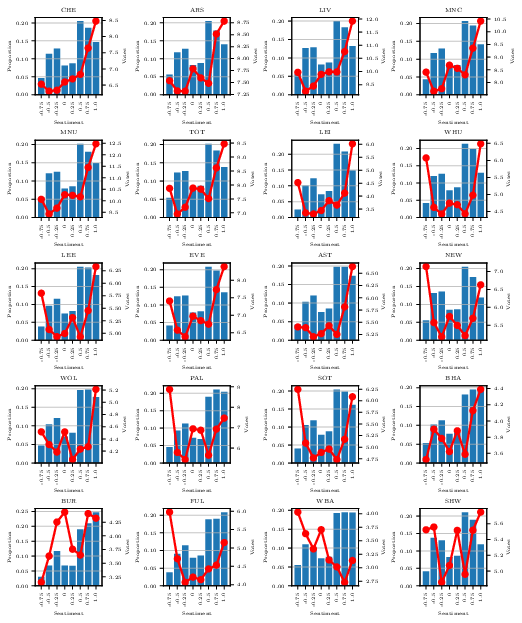

In [69]:
fig, ax = plt.subplots(5, 4)
fig.set_size_inches(7.2, 8.6)

for i in tq.tqdm(range(len(premier_abb))):
    team = premier_abb[i]
    ax[int(i/4),int(i%4)].bar(ind, dis[team])
    ax1 = ax[int(i/4),int(i%4)].twinx()
    ax1.plot(ind,div[team],'-ro',linewidth=2)
    ax[int(i/4),int(i%4)].grid(axis='y', alpha=0.75)
    ax[int(i/4),int(i%4)].set_ylabel('Proportion')
    ax[int(i/4),int(i%4)].set_xlabel('Sentiment')
    ax[int(i/4),int(i%4)].set_title(team)
    ax1.set_ylabel('Votes')
    ax[int(i/4),int(i%4)].set_xticklabels(ind,rotation=90)
fig.tight_layout()
plt.savefig('../../Final Report/Assets/Votes_Sentiment_Proportion.pgf', bbox_inches='tight')

In [32]:
    print(team,"-1.0~-0,75:",df_0.loc[df_0.sentiment_score<-0.75].shape[0]/size,"  /  ",df_0.loc[df_0.sentiment_score<-0.75]['ups'].mean())
    print(team,"-0,75~-0.50:",df_0.loc[(df_0.sentiment_score>=-0.75)&(df_0.sentiment_score<-0.5)].shape[0]/size,"  /  ",df_0.loc[(df_0.sentiment_score>=-0.75)&(df_0.sentiment_score<-0.5)]['ups'].mean())
    print(team,"-0.50~-0.25:",df_0.loc[(df_0.sentiment_score>=-0.50)&(df_0.sentiment_score<-0.25)].shape[0]/size,"  /  ",df_0.loc[(df_0.sentiment_score>=-0.50)&(df_0.sentiment_score<-0.25)]['ups'].mean())
    print(team,"-0,25~0.00:",df_0.loc[(df_0.sentiment_score>=-0.25)&(df_0.sentiment_score<0)].shape[0]/size,"  /  ",df_0.loc[(df_0.sentiment_score>=-0.25)&(df_0.sentiment_score<0)]['ups'].mean())
    print(team,"0.00~0.25:",df_0.loc[(df_0.sentiment_score>=0.00)&(df_0.sentiment_score<0.25)].shape[0]/size,"  /  ",df_0.loc[(df_0.sentiment_score>=0.00)&(df_0.sentiment_score<0.25)]['ups'].mean())
    print(team,"0.25~0.50:",df_0.loc[(df_0.sentiment_score>0.25)&(df_0.sentiment_score<=0.50)].shape[0]/size,"  /  ",df_0.loc[(df_0.sentiment_score>0.25)&(df_0.sentiment_score<=0.50)]['ups'].mean())
    print(team,"0.50~0.75:",df_0.loc[(df_0.sentiment_score>0.50)&(df_0.sentiment_score<=0.75)].shape[0]/size,"  /  ",df_0.loc[(df_0.sentiment_score>0.50)&(df_0.sentiment_score<=0.75)]['ups'].mean())
    print(team,"0.75~1.0:",df_0.loc[df_0.sentiment_score>0.75].shape[0]/size,"  /  ",df_0.loc[df_0.sentiment_score>0.75]['ups'].mean())

TOT -1.0~-0,75: 0.45835151315039524   /   8.34174056223522
TOT -0,75~-0.50: 1.0509506570284155   /   7.725887831241935
TOT -0.50~-0.25: 1.1154939210622516   /   7.773539827686453
TOT -0,25~0.00: 0.7086394421449432   /   8.258253827379631
TOT 0.00~0.25: 0.7600853763516939   /   8.219260684291093
TOT 0.25~0.50: 1.7859144742789983   /   8.104870339964169
TOT 0.50~0.75: 1.6151263939497569   /   9.055676295288555
TOT 0.75~1.0: 1.2544152388140077   /   9.871718782804338
